<a href="https://colab.research.google.com/github/RahmanMonty/Data606Capstone/blob/main/Baltimore_Tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import json
import random
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import datetime

In [2]:
data = pd.read_csv('/content/Part1_Crime_data.csv')
data.head(5)

X              Y  RowID  ... VRIName Total_Incidents Shape
0  1.431688e+06  604046.096242      1  ...     NaN             1.0   NaN
1  1.415386e+06  598803.710854      2  ...     NaN             1.0   NaN
2  1.413955e+06  581387.604790      3  ...     NaN             1.0   NaN
3  1.413955e+06  581387.604790      4  ...     NaN             1.0   NaN
4  1.424268e+06  586493.057063      5  ...     NaN             1.0   NaN

[5 rows x 19 columns]

In [3]:
data.shape

(156006, 19)

In [4]:
data['Inside_Outside'] = data['Inside_Outside'].notnull().astype(int)
data['District'] = data['District'].notnull().astype(int)

In [5]:
label_encoder = preprocessing.LabelEncoder()
data["CrimeCode"] = label_encoder.fit_transform(data["CrimeCode"])
data["Description"] = label_encoder.fit_transform(data["Description"])
data["Inside_Outside"] = label_encoder.fit_transform(data["Inside_Outside"])
data["District"] = label_encoder.fit_transform(data["District"])
data["Inside_Outside"].unique()

array([0, 1])

In [6]:
data_model = data[["CrimeCode", "Description", "Inside_Outside", 
                   "District"]]
data_model.head(5)

CrimeCode  Description  Inside_Outside  District
0         55            6               0         1
1         81           13               1         1
2         81           13               1         1
3         81           13               1         1
4         55            6               1         1

In [7]:
data_model = data_model.apply(pd.to_numeric, errors='coerce')

scaler = MinMaxScaler()
scaler.fit(data_model)
X_scale = scaler.transform(data_model)
df_scale = pd.DataFrame(X_scale, columns=data_model.columns)
df_scale.head(5)


CrimeCode  Description  Inside_Outside  District
0   0.679012     0.461538             0.0       1.0
1   1.000000     1.000000             1.0       1.0
2   1.000000     1.000000             1.0       1.0
3   1.000000     1.000000             1.0       1.0
4   0.679012     0.461538             1.0       1.0

In [8]:
df_scale.dtypes

CrimeCode         float64
Description       float64
Inside_Outside    float64
District          float64
dtype: object

In [9]:
df_scale["CrimeCode"] = df_scale["CrimeCode"].astype(int)
df_scale["Description"] = df_scale["Description"].astype(int)
df_scale["Inside_Outside"] = df_scale["Inside_Outside"].astype(int)
df_scale["District"] = df_scale["District"].astype(int)
# df_scale["Post"] = df_scale["Post"].astype(int)

# df_scale['Inside_Outside'] = df_scale['Inside_Outside'].notnull().astype(int)


In [10]:
df_scale.dtypes

CrimeCode         int64
Description       int64
Inside_Outside    int64
District          int64
dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (6) found smaller than n_clusters (11). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages

Text(0, 0.5, 'Inertia')

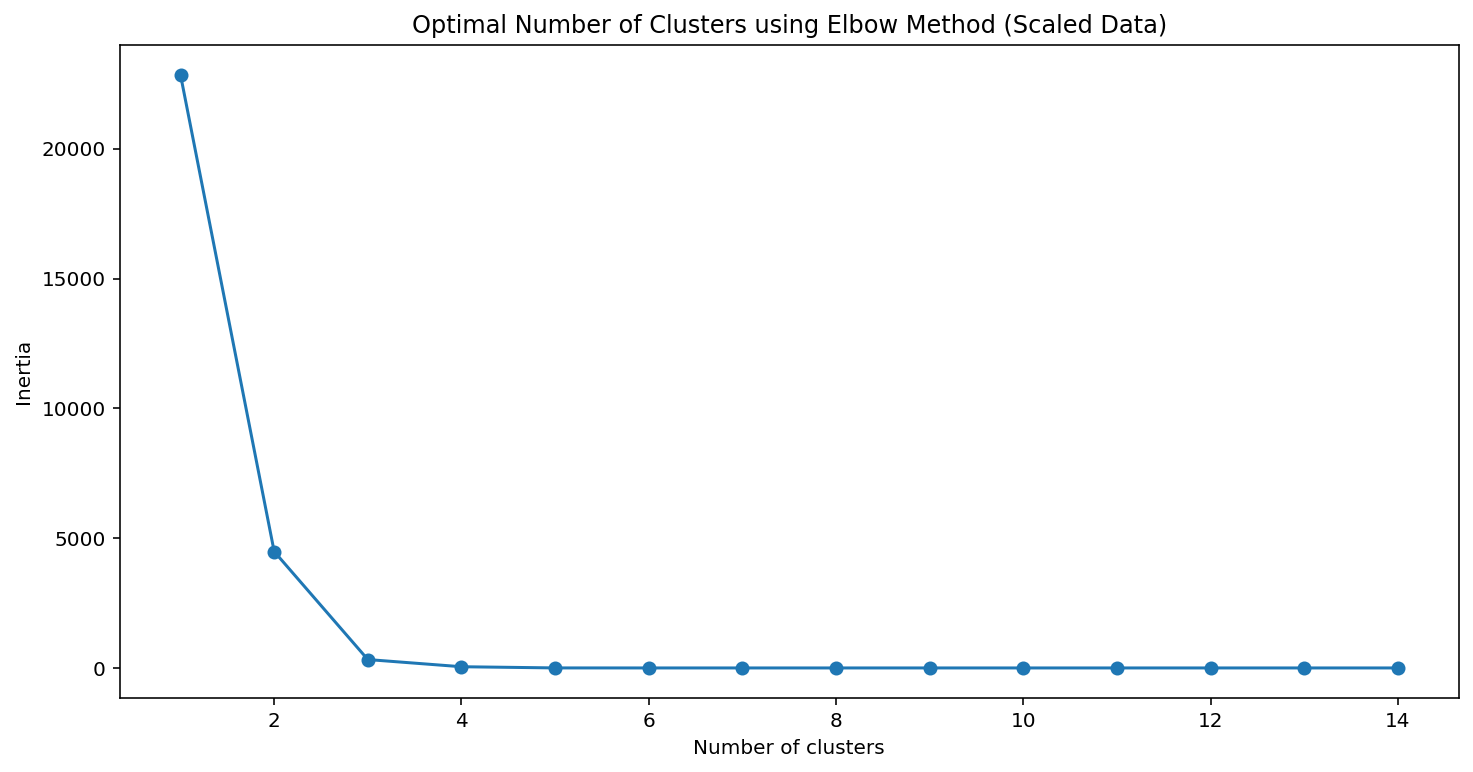

In [11]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(df_scale)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [12]:
from sklearn.metrics import silhouette_score

df_scale2 = df_scale.copy()
kmeans_scale = KMeans(n_clusters=3, n_init=100, max_iter=100, init='k-means++', random_state=42).fit(df_scale2)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale2, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df_scale2, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

KMeans Scaled Silhouette Score: 0.9964656096858838


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



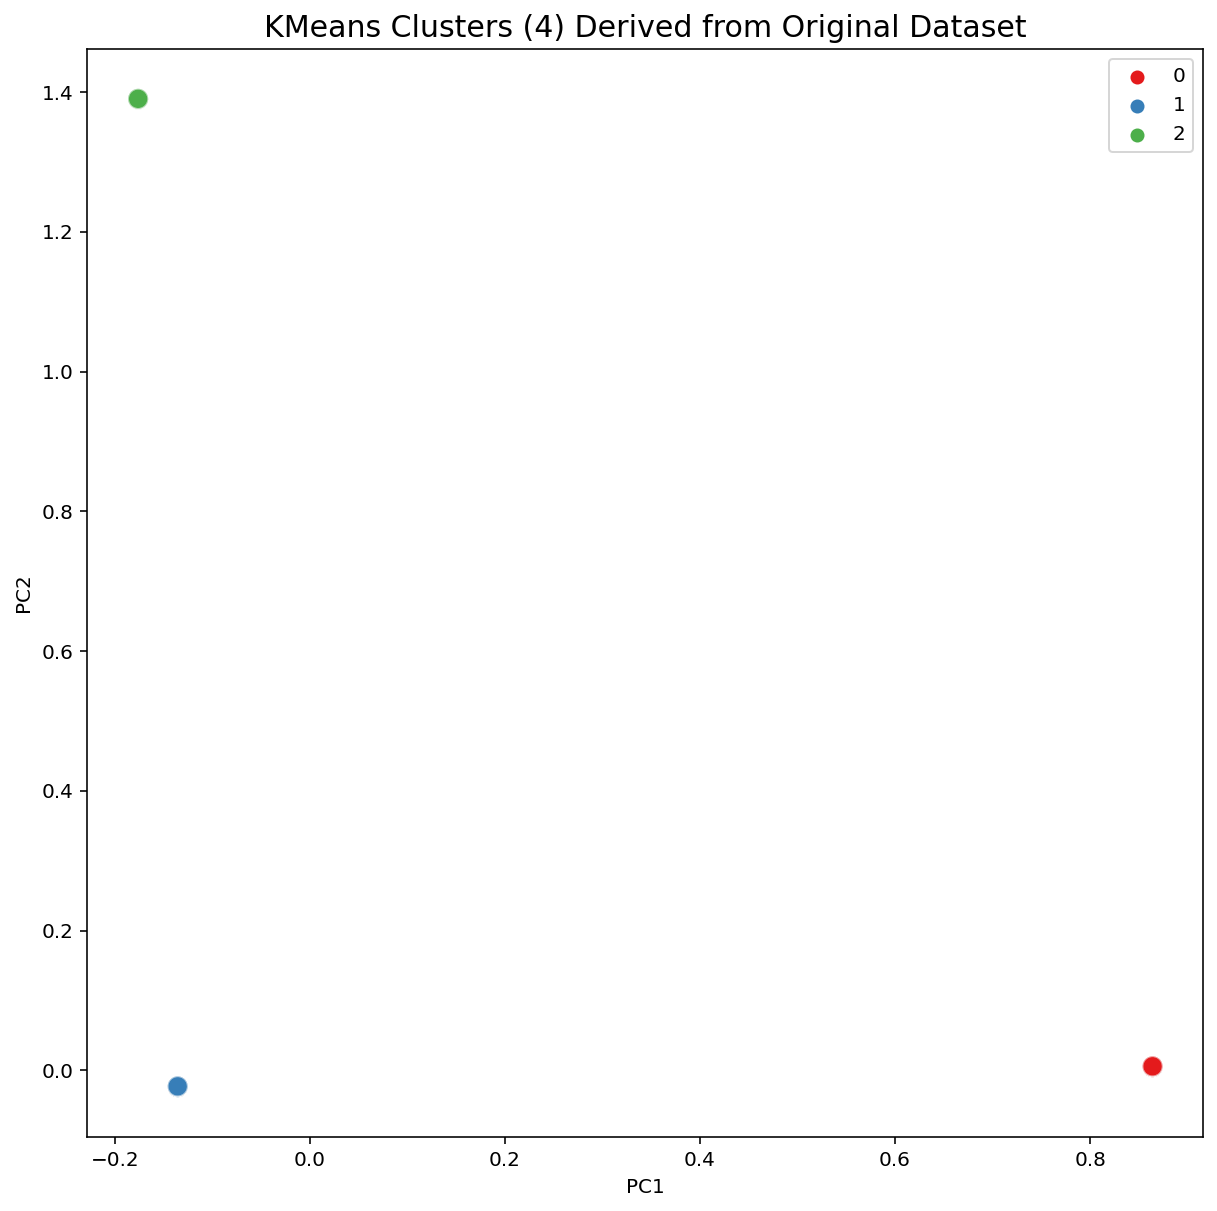

In [13]:
import seaborn as sns
pca2 = PCA(n_components=4).fit(df_scale2)
pca2d = pca2.transform(df_scale2)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

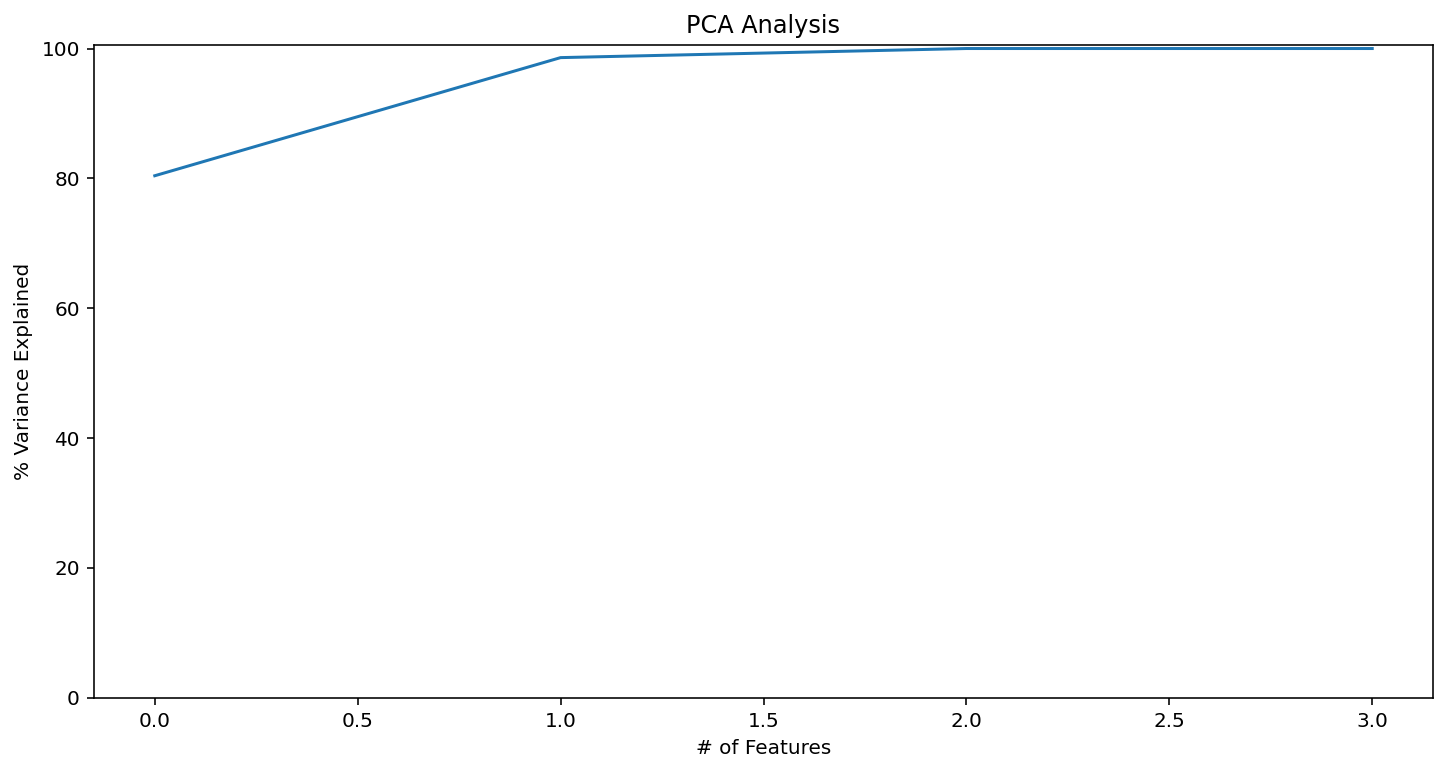

In [14]:
# n_components=4 because we have 4 features in the dataset
pca = PCA(n_components=4)
pca.fit(df_scale)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [15]:
pca = PCA(n_components=3)
pca_scale = pca.fit_transform(df_scale)
pca_df_scale = pd.DataFrame(pca_scale, columns=['pc1','pc2','pc3'])
print(pca.explained_variance_ratio_)

[0.80376888 0.18207659 0.01415452]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (8) found smaller than n_clusters (12). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (8) found smaller than n_clusters (13). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packag

Text(0, 0.5, 'Inertia')

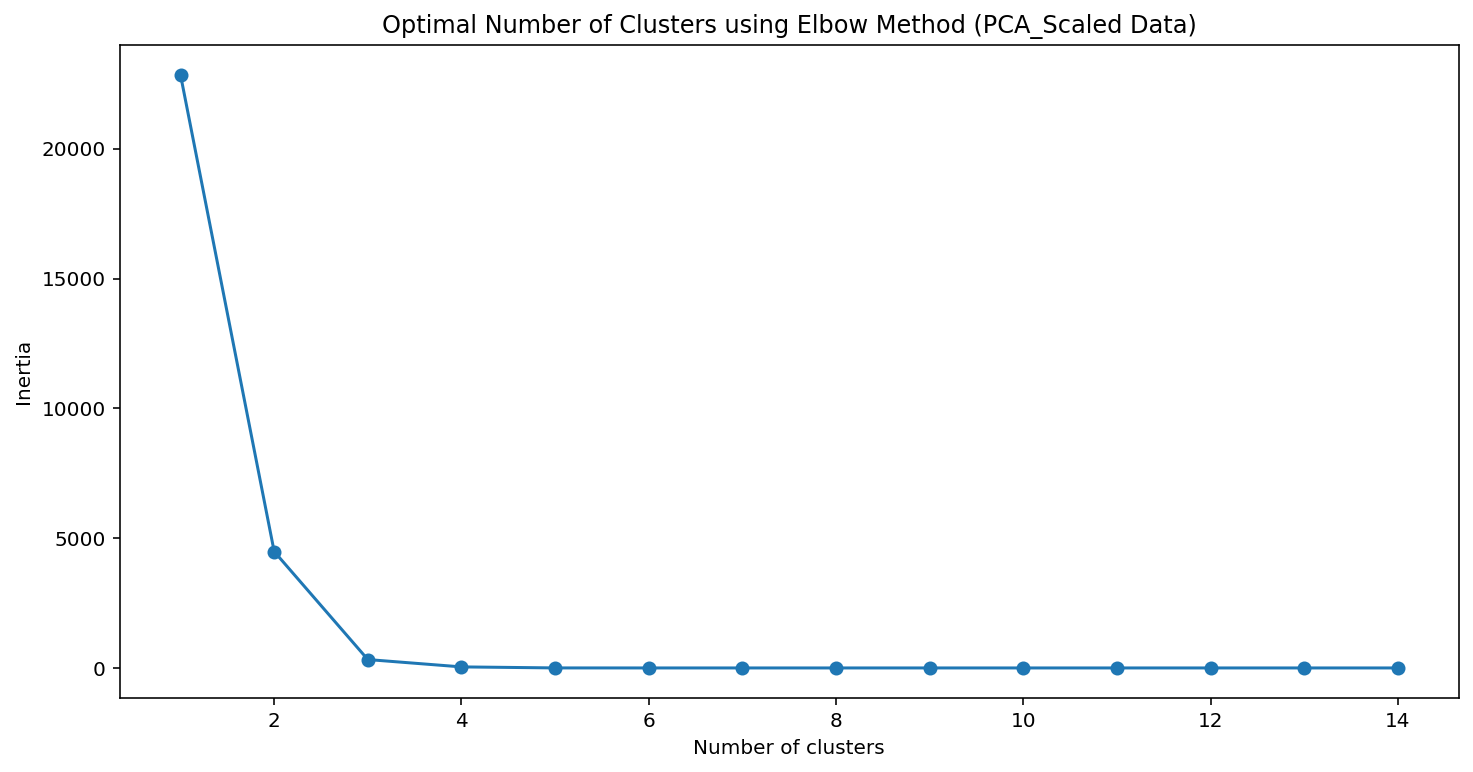

In [16]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(pca_df_scale)
    sse.append([k, km.inertia_])
    
pca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (PCA_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [17]:
kmeans_pca_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.9994837689238673


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



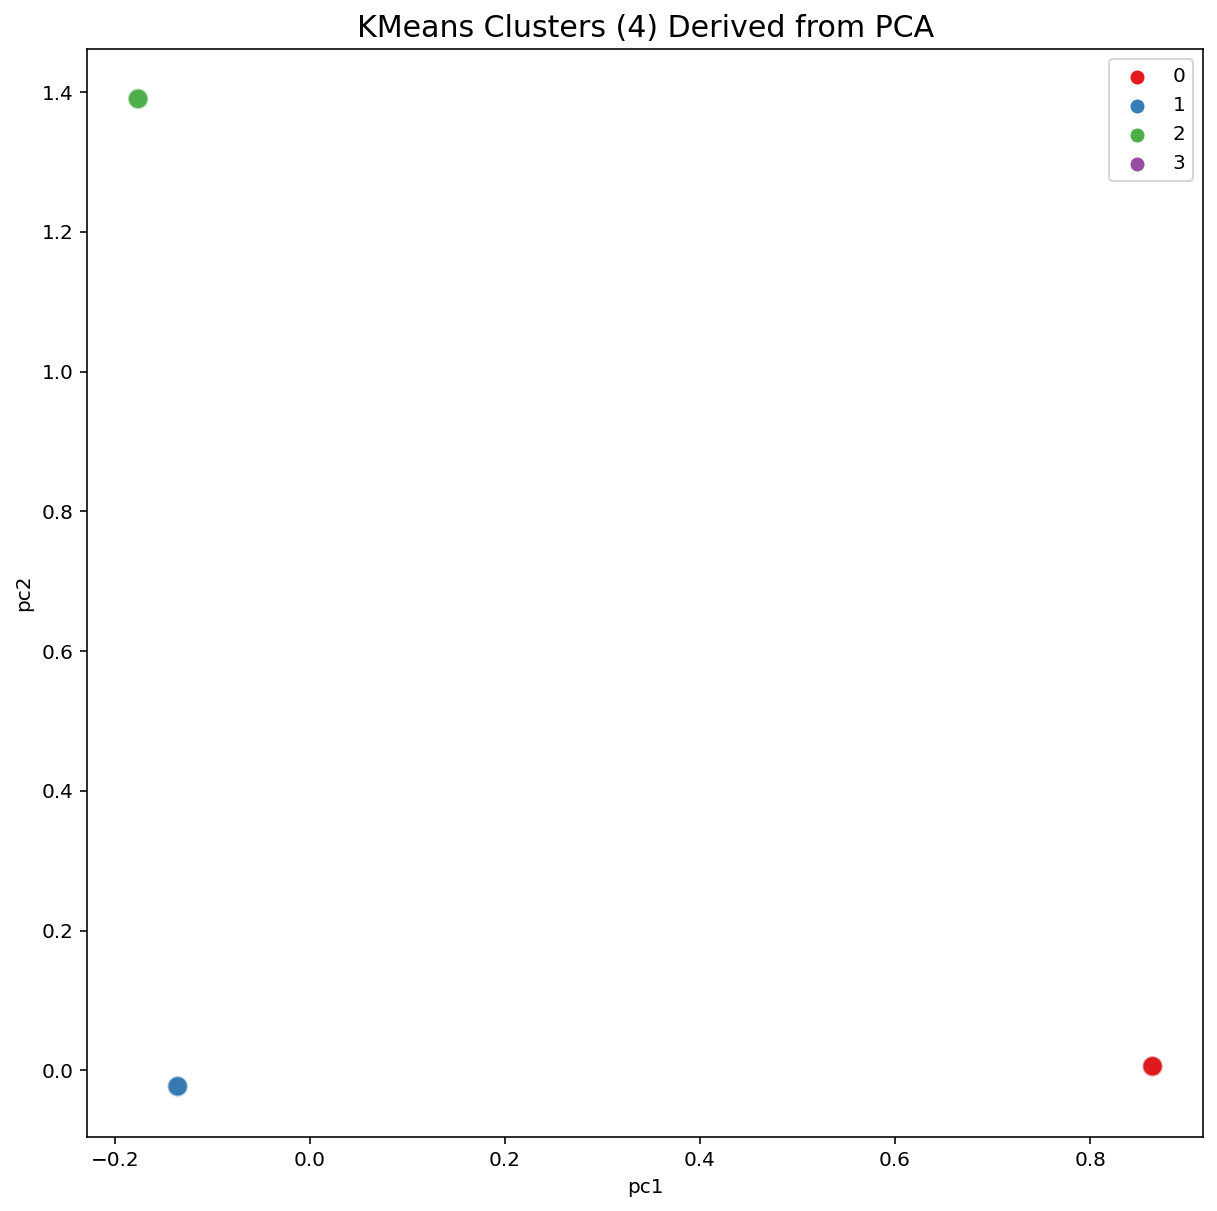

In [18]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], hue=labels_pca_scale, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from PCA', fontsize=15)
plt.legend()
plt.show()



[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 156006 samples in 27.907s...
[t-SNE] Computed neighbors for 156006 samples in 275.811s...
[t-SNE] Computed conditional probabilities for sample 1000 / 156006
[t-SNE] Computed conditional probabilities for sample 2000 / 156006
[t-SNE] Computed conditional probabilities for sample 3000 / 156006
[t-SNE] Computed conditional probabilities for sample 4000 / 156006
[t-SNE] Computed conditional probabilities for sample 5000 / 156006
[t-SNE] Computed conditional probabilities for sample 6000 / 156006
[t-SNE] Computed conditional probabilities for sample 7000 / 156006
[t-SNE] Computed conditional probabilities for sample 8000 / 156006
[t-SNE] Computed conditional probabilities for sample 9000 / 156006
[t-SNE] Computed conditional probabilities for sample 10000 / 156006
[t-SNE] Computed conditional probabilities for sample 11000 / 156006
[t-SNE] Computed conditional probabilities for sample 12000 / 156006
[t-SNE] Computed conditional pro

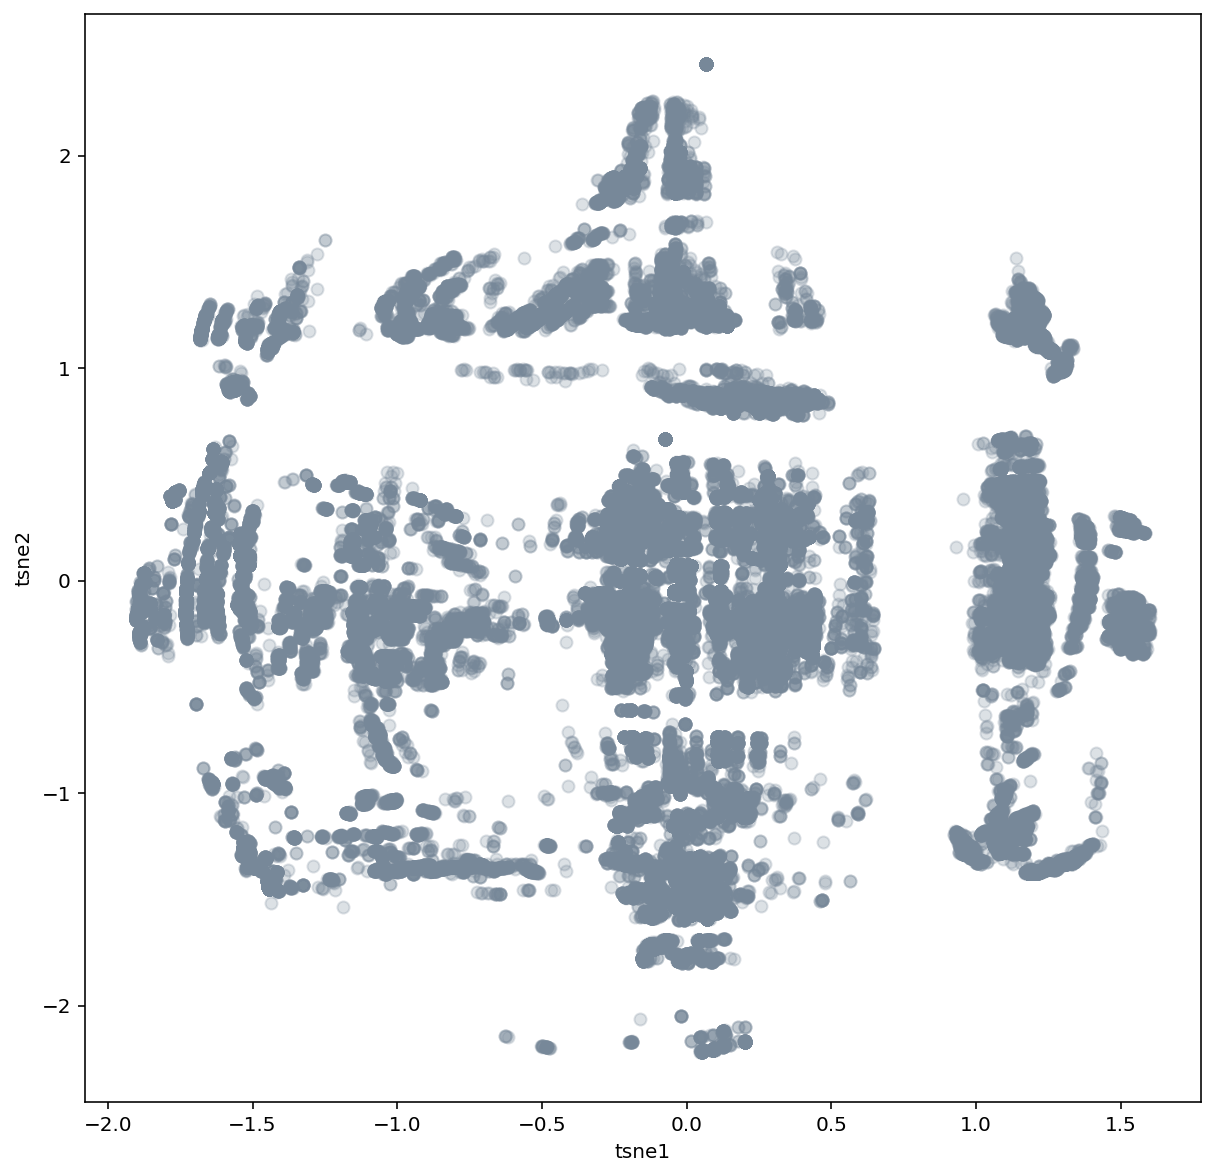

In [25]:
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df_scale)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Text(0, 0.5, 'Inertia')

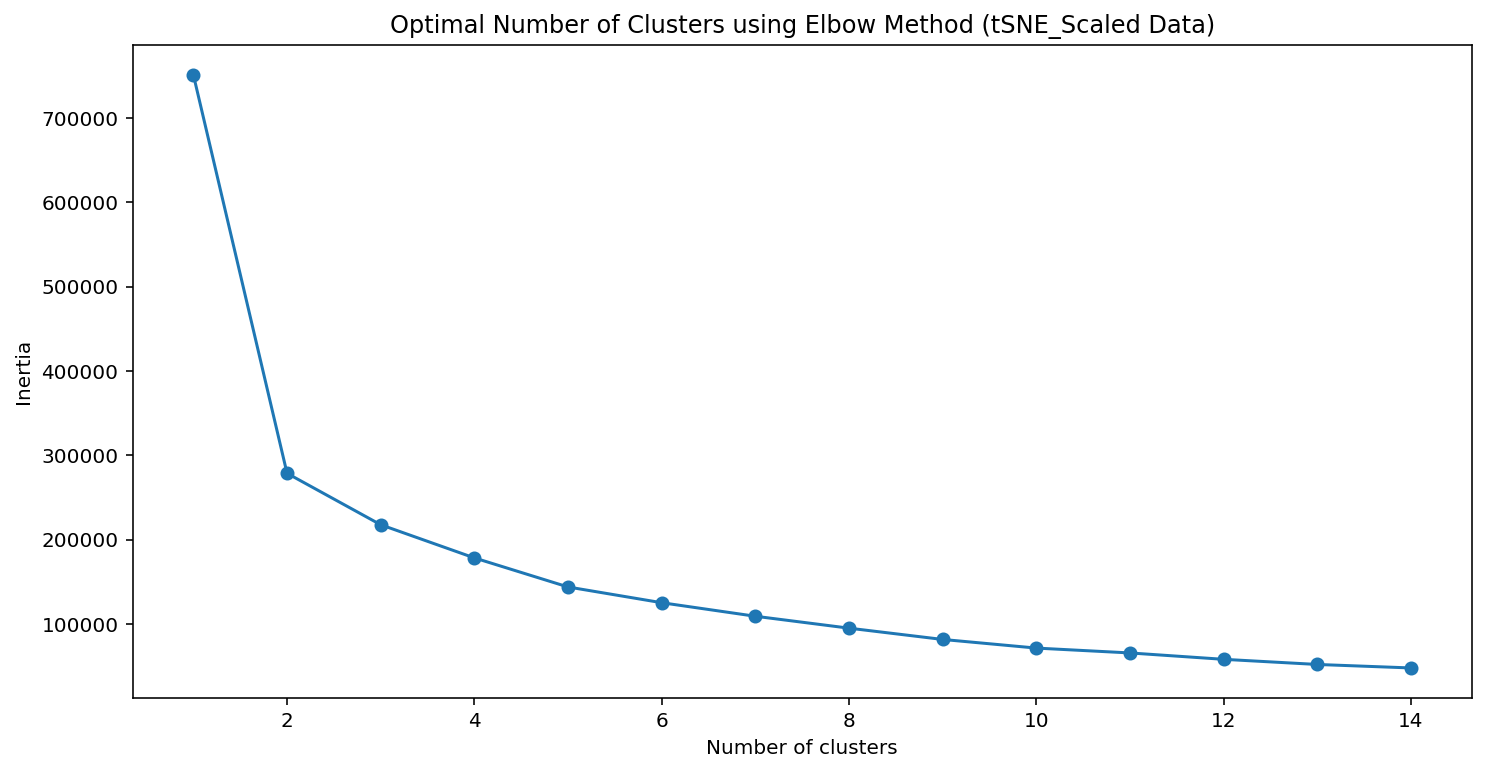

In [26]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [27]:
kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.3525014817714691


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



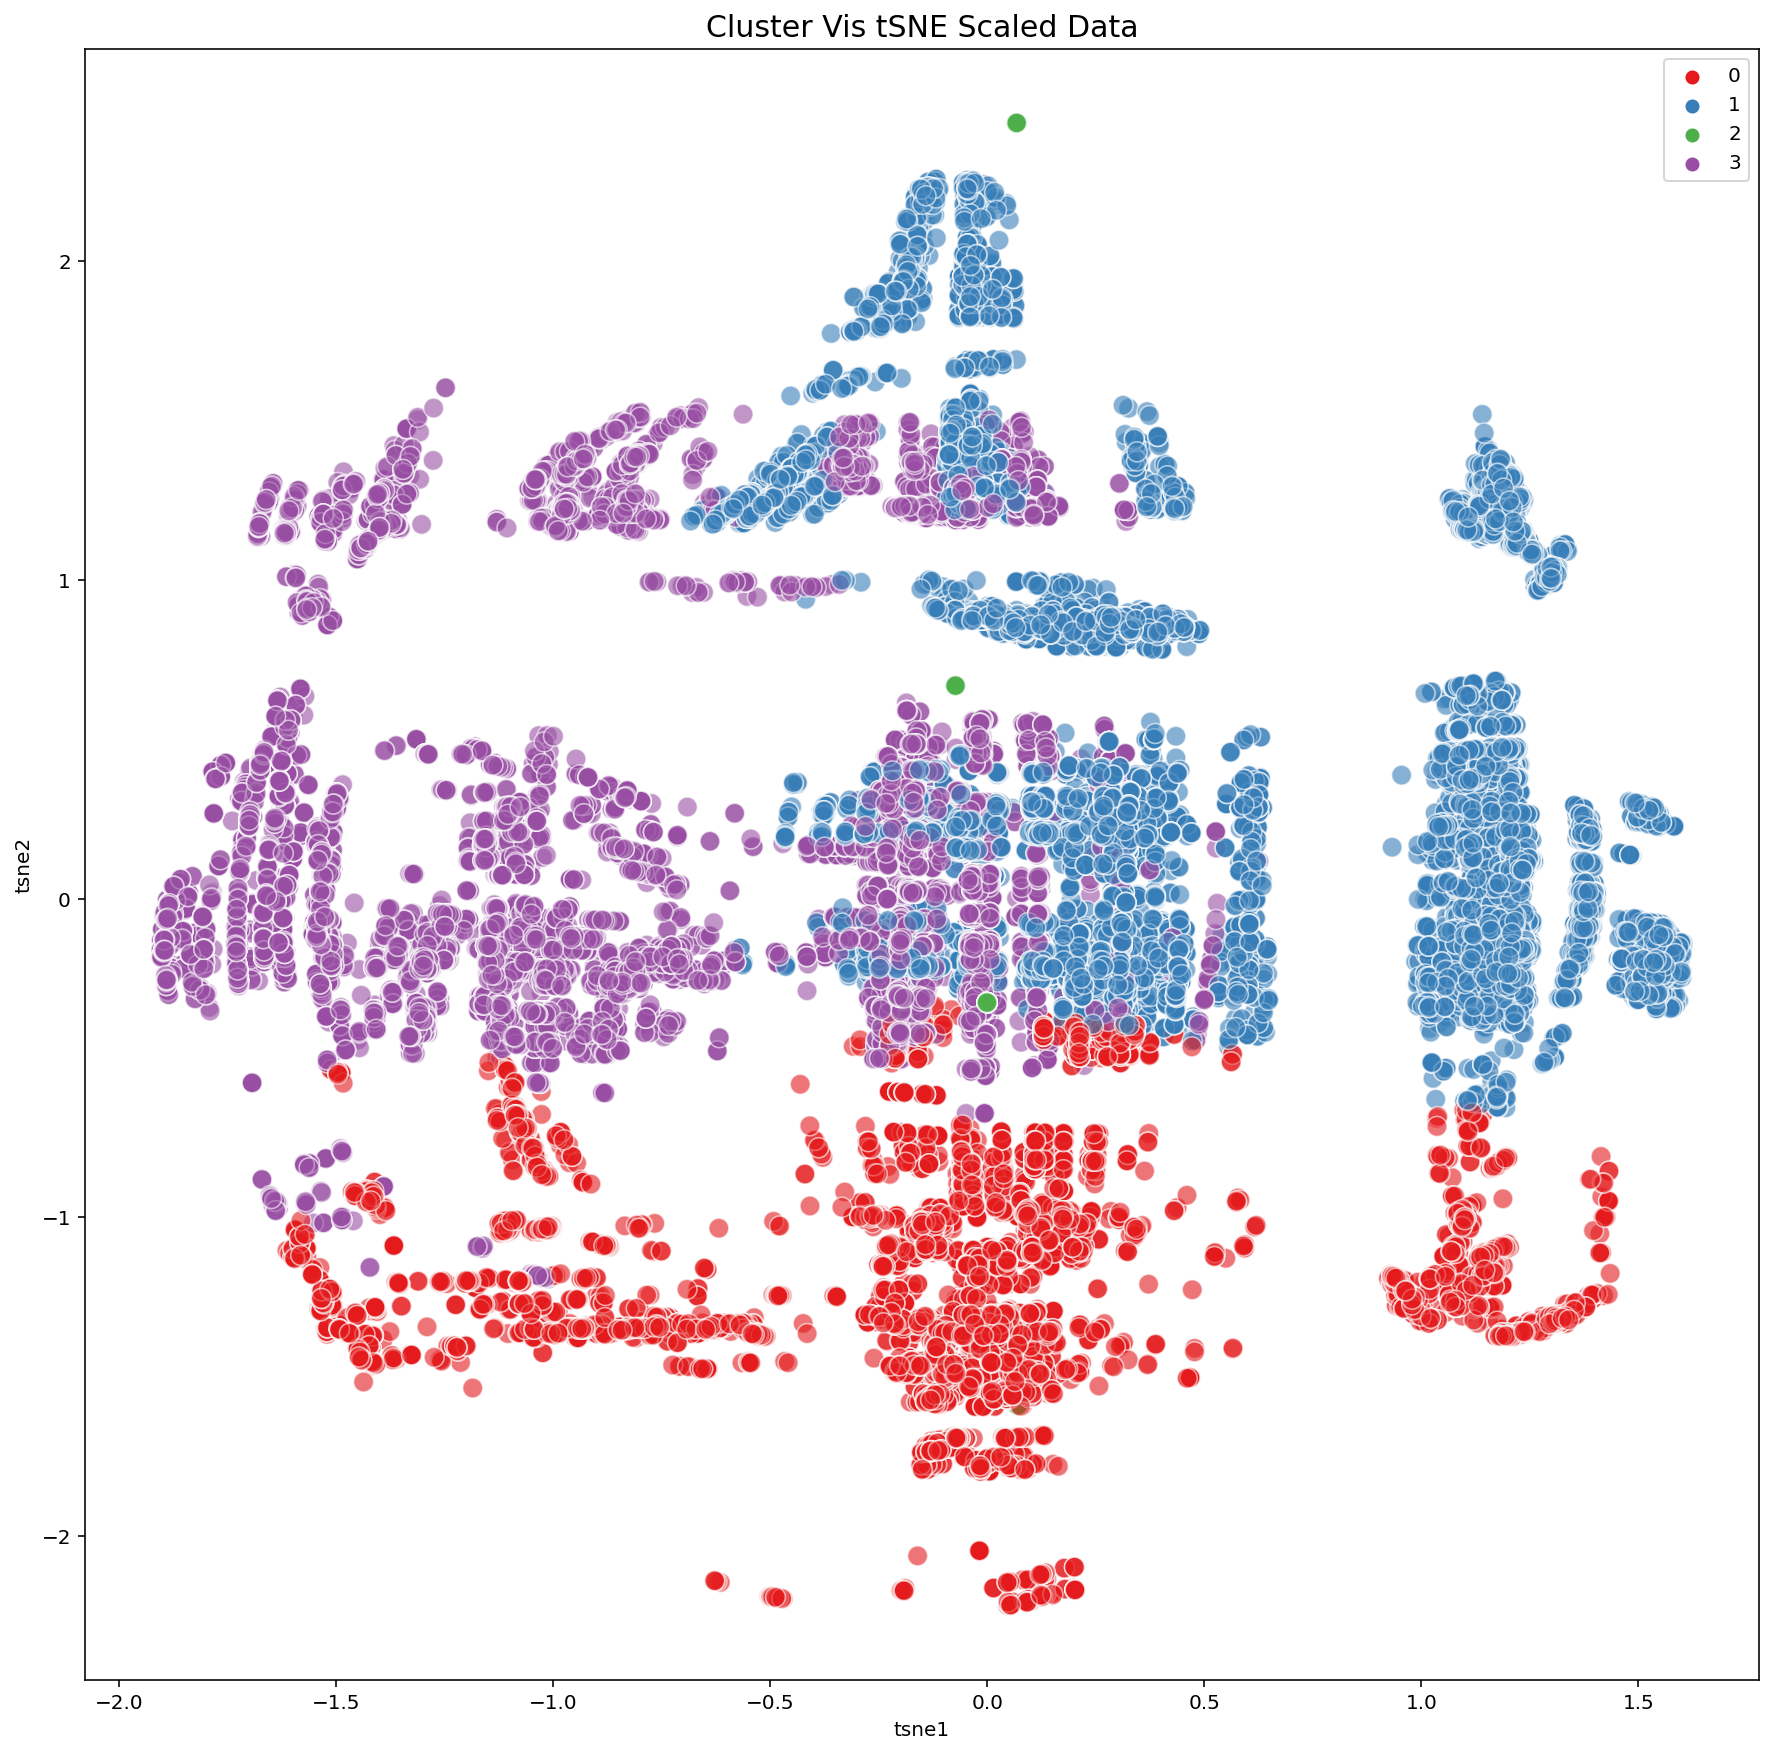

In [28]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

In [30]:
cluster_tsne_profile = pd.merge(data, clusters_tsne_scale['tsne_clusters'], left_index=True, right_index=True )
cluster_pca_profile = pd.merge(data, clusters_pca_scale['pca_clusters'], left_index=True, right_index=True )

TypeError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fdbf2872560> (for post_execute):


KeyboardInterrupt: ignored

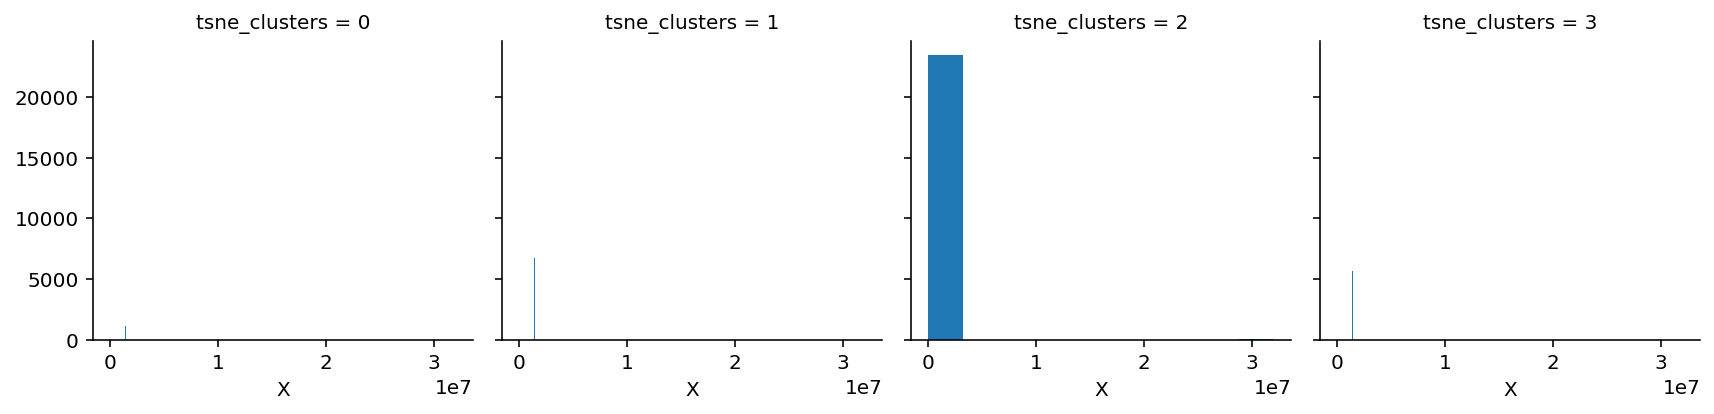

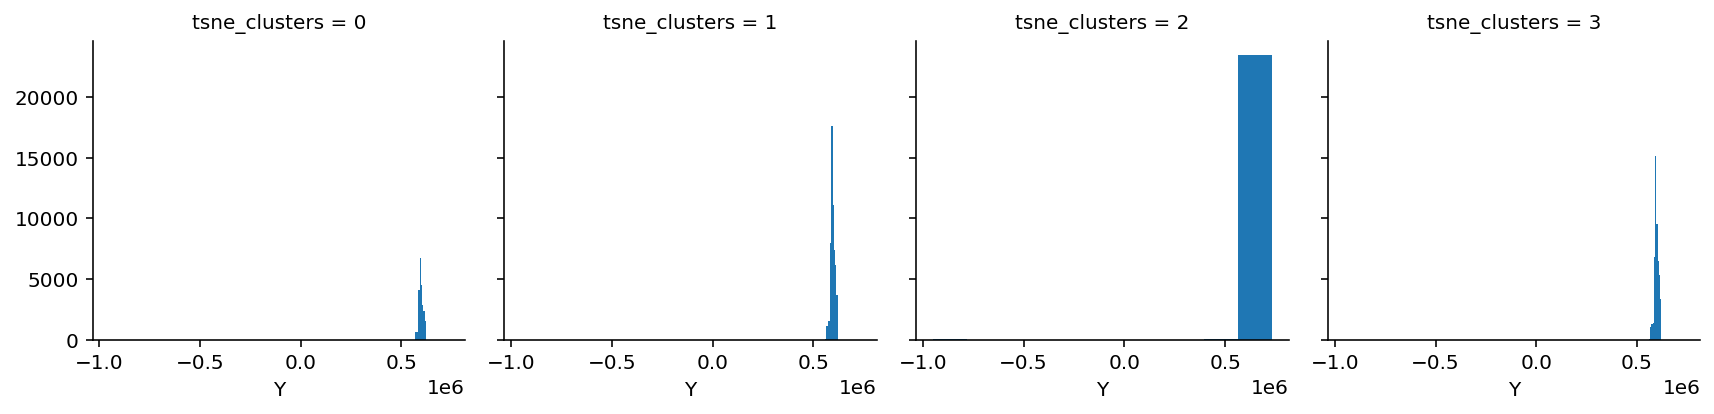

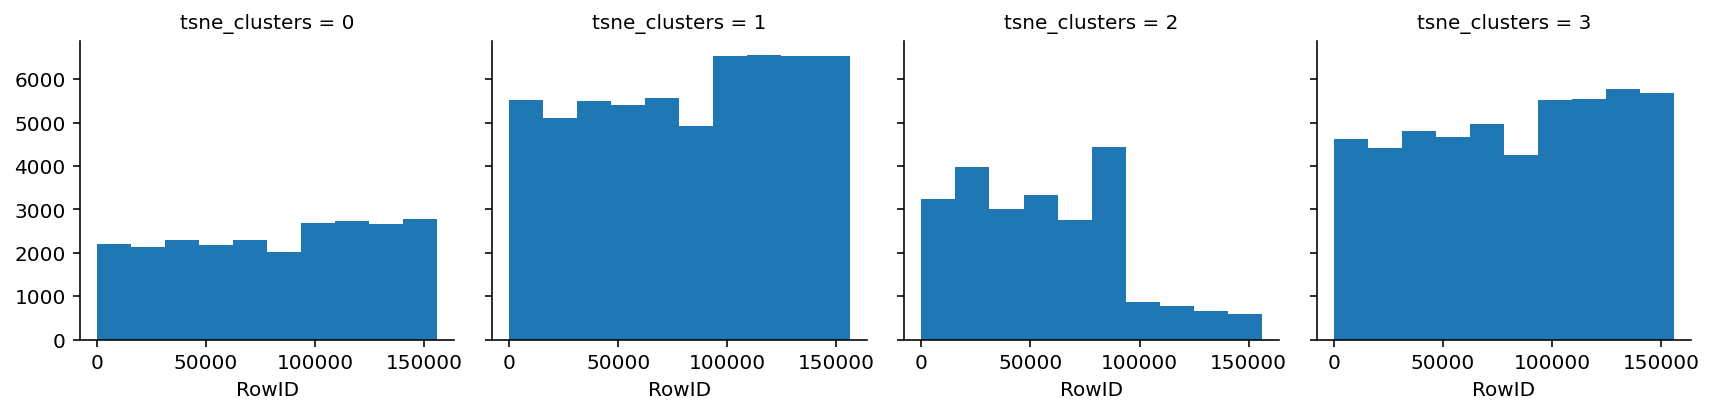

Error in callback <function flush_figures at 0x7fdbf287a050> (for post_execute):


KeyboardInterrupt: ignored

In [31]:
for c in cluster_tsne_profile:
    grid = sns.FacetGrid(cluster_tsne_profile, col='tsne_clusters')
    grid.map(plt.hist, c)

In [32]:
clusters_tsne_scale.head()

tsne1     tsne2     tsne3  tsne_clusters
0 -0.000856 -0.326549 -4.205302              2
1 -0.073398  0.667867 -6.718356              2
2 -0.073398  0.667867 -6.718356              2
3 -0.073398  0.667867 -6.718356              2
4 -1.029886 -0.255749  0.358432              3

In [34]:
df_segm_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(clusters_tsne_scale)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['component 1', "component 2", "component 3"]

df_segm_pca_kmeans['Segment K-means TSNE'] = kmeans_tsne_scale .labels_

In [35]:
df_segm_pca_kmeans.head()

X              Y  ...  component 3 Segment K-means TSNE
0  1.431688e+06  604046.096242  ...            2                    2
1  1.415386e+06  598803.710854  ...            2                    2
2  1.413955e+06  581387.604790  ...            2                    2
3  1.413955e+06  581387.604790  ...            2                    2
4  1.424268e+06  586493.057063  ...            3                    3

[5 rows x 24 columns]

In [36]:
group0_red = df_segm_pca_kmeans[df_segm_pca_kmeans['Segment K-means TSNE'] == 0]
group1_blue = df_segm_pca_kmeans[df_segm_pca_kmeans['Segment K-means TSNE'] == 1]
group2_green = df_segm_pca_kmeans[df_segm_pca_kmeans['Segment K-means TSNE'] == 2]
group3_purple = df_segm_pca_kmeans[df_segm_pca_kmeans['Segment K-means TSNE'] == 3]

In [37]:
group0_red.head()

X              Y  ...  component 3 Segment K-means TSNE
5   1.441317e+06  619062.791171  ...            0                    0
12  1.413030e+06  593330.868974  ...            0                    0
13  1.412791e+06  589505.463782  ...            0                    0
19  1.418523e+06  592806.506493  ...            0                    0
51  1.419648e+06  594632.335009  ...            0                    0

[5 rows x 24 columns]

In [38]:
group1_blue.head()

X              Y  ...  component 3 Segment K-means TSNE
6   1.430556e+06  598030.938753  ...            1                    1
7   1.429564e+06  592235.040164  ...            1                    1
9   1.412791e+06  589505.463782  ...            1                    1
11  1.396172e+06  616618.363302  ...            1                    1
18  1.437802e+06  603528.711679  ...            1                    1

[5 rows x 24 columns]

In [39]:
group2_green.head()

X              Y  ...  component 3 Segment K-means TSNE
0  1.431688e+06  604046.096242  ...            2                    2
1  1.415386e+06  598803.710854  ...            2                    2
2  1.413955e+06  581387.604790  ...            2                    2
3  1.413955e+06  581387.604790  ...            2                    2
8  1.428002e+06  593393.558177  ...            2                    2

[5 rows x 24 columns]

In [40]:
group3_purple.head()

X              Y  ...  component 3 Segment K-means TSNE
4   1.424268e+06  586493.057063  ...            3                    3
14  1.421362e+06  577374.808130  ...            3                    3
21  1.429814e+06  593292.461971  ...            3                    3
42  1.420040e+06  595617.406328  ...            3                    3
60  1.408070e+06  595461.003335  ...            3                    3

[5 rows x 24 columns]

In [41]:
group0_red.describe()

X              Y  ...  component 3  Segment K-means TSNE
count  2.396100e+04   23961.000000  ...      23961.0               23961.0
mean   1.420423e+06  597303.203214  ...          0.0                   0.0
std    1.206946e+04   10835.103397  ...          0.0                   0.0
min    1.393965e+06  560067.993665  ...          0.0                   0.0
25%    1.411400e+06  590685.622078  ...          0.0                   0.0
50%    1.421463e+06  595739.117295  ...          0.0                   0.0
75%    1.429152e+06  604618.336651  ...          0.0                   0.0
max    1.445450e+06  621365.191927  ...          0.0                   0.0

[8 rows x 16 columns]

In [42]:
group1_blue.describe()

X              Y  ...  component 3  Segment K-means TSNE
count  5.816400e+04   58164.000000  ...      58164.0               58164.0
mean   1.420483e+06  597402.635720  ...          1.0                   1.0
std    1.207116e+04   10782.683558  ...          0.0                   0.0
min    1.393965e+06  558766.380797  ...          1.0                   1.0
25%    1.411486e+06  590741.758943  ...          1.0                   1.0
50%    1.421463e+06  595956.765702  ...          1.0                   1.0
75%    1.429160e+06  604731.538423  ...          1.0                   1.0
max    1.445450e+06  621392.919676  ...          1.0                   1.0

[8 rows x 16 columns]

In [43]:
group2_green.describe()

X              Y  ...  component 3  Segment K-means TSNE
count  2.354900e+04   23549.000000  ...      23631.0               23631.0
mean   1.511949e+06  592290.455448  ...          2.0                   2.0
std    1.668686e+06   84934.290054  ...          0.0                   0.0
min   -1.720966e+00 -948896.130248  ...          2.0                   2.0
25%    1.412530e+06  590336.574403  ...          2.0                   2.0
50%    1.421870e+06  595246.154051  ...          2.0                   2.0
75%    1.429546e+06  603812.344614  ...          2.0                   2.0
max    3.207084e+07  731212.664779  ...          2.0                   2.0

[8 rows x 16 columns]

In [44]:
group3_purple.describe()

X              Y  ...  component 3  Segment K-means TSNE
count  5.025000e+04   50250.000000  ...      50250.0               50250.0
mean   1.420582e+06  597480.269073  ...          3.0                   3.0
std    1.212470e+04   10844.842762  ...          0.0                   0.0
min    1.393965e+06  558766.380797  ...          3.0                   3.0
25%    1.411460e+06  590771.641471  ...          3.0                   3.0
50%    1.421640e+06  595996.109508  ...          3.0                   3.0
75%    1.429312e+06  604980.681343  ...          3.0                   3.0
max    1.445450e+06  621369.250963  ...          3.0                   3.0

[8 rows x 16 columns]

In [45]:
group0_red.to_excel("Bmore_red.xlsx")
group1_blue.to_excel("Bmore_blue.xlsx")
group2_green.to_excel("Bmore_green.xlsx")
group3_purple.to_excel("Bmore_purple.xlsx")